<a href="https://github.com/victoresende19">![Foo](https://www.jornaldevinhedo.com.br/wp-content/uploads/2022/07/1e45483b-4bba-4b0c-b885-de7715cf8afd.jpeg)</a>

<h2 style="text-align:center">Processamento de Linguagem Natural: Plano de Governo Sofia Mazano (PCB) <h2\>
<p style="text-align:center;font-size:13px;"></p>
   
<h2 style="text-align:center">Victor Augusto Souza Resende<h2\>
<p style="text-align:center;font-size:13px;">Autor</p>

## Sumário

- [1. Contexto](#1) <br>
    
- [2. Instaçaões e Bibliotecas](#2) <br>
    
- [3. Leitura do arquivo PDF](#3) <br>
    
- [4. Exploração do PDF](#4) <br>
    
- [5. Junção de todo contéudo](#5) <br>
    
- [6. Pipeline](#6) <br>
    * [6.1 - Lower case](#61)<br>
    * [6.2 - Retirar pontuação](#62)<br>
    * [6.3 - Tokenização](#63)<br>
    * [6.4 - Stop words](#64)<br>
        
- [7. Gráficos](#7) <br>
    * [7.1 - Gráfico de frequência dos tokens limpos ](#7)<br>
    * [7.2 - Nuvem de palavras](#7)<br>

## Contexto  <a id="1"></a>

A análise a seguir tem como objetivo aplicar técnicas de Processamento de Linguagem Natural sobre o plano de governo disponibilizado pelos candidatos da eleição presidencial do Brasil em 2022. 

Portanto, o notebook utilizou os dados referentes ao texto disponibilizado pela candidata Sofia Mazano do partido PCB, do qual pode ser visualizado clicando <a href="https://divulgacandcontas.tse.jus.br/candidaturas/oficial/2022/BR/BR/544/candidatos/890829/programa.pdf">aqui</a>.

## Instações e bibliotecas  <a id="2"></a>

In [1]:
!pip install pdfplumber -q
!pip install wordcloud -q
!pip install Pillow -q

In [2]:
import pdfplumber
import re
import nltk
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Leitura do arquivo PDF <a id="3"></a>

In [3]:
mdb = '../PlanosPDF/PLANOPCB.pdf'

In [4]:
pdf = pdfplumber.open(mdb)

## Exploração do PDF <a id="4"></a>

In [5]:
# Metadados
pdf.metadata

{'Author': 'edneg',
 'CreationDate': "D:20220730175316-03'00'",
 'ModDate': "D:20220730175316-03'00'",
 'Producer': 'Microsoft: Print To PDF',
 'Title': 'Programa Político do PCB eleições 2022 FINAL.pdf'}

In [6]:
# Quantidade de páginas
len(pdf.pages)

19

In [7]:
# Página 1
pdf.pages[0].extract_text()

'PROGRAMA POLÍTICO DO PCB PARA AS ELEIÇÕES 2022\nCANDIDATURA DE SOFIA MANZANO A PRESIDENTE E ANTONIO\nALVES VICE-PRESIDENTE\nUm programa anticapitalista e anti-imperialista para o Brasil\n1. O Brasil vive atualmente a maior crise do último meio século uma crise econômica,\nsocial e política, agravada pela crise sanitária que explicitou todas as mazelas do capitalismo\nbrasileiro. Não podemos esquecer ainda que a crise brasileira, apesar de suas singularidades,\nestá inscrita na crise sistêmica do capitalismo mundial, cujos desdobramentos continuarão\ntendo profundos impactos no nosso país. Essa crise foi agravada por mais de três décadas de\no crescimento econômico,\naprofundaram o processo de desindustrialização do país, entregaram o patrimônio público\npara o capital nacional e internacional, dilapidaram o fundo público em favor das grandes\nempresas, reduziram direitos e salários dos trabalhadores, juventude e pensionistas,\nprecarizaram as condições de trabalho, concentraram escand

In [8]:
# Página 3
print(pdf.pages[4].extract_text())

educação básica. Fim do vestibular e estatização das instituições de ensino superior.
Construção de creches nas universidades públicas federais. Destinação da maioria das
vagas das universidades públicas para os alunos de escolas públicas, principalmente os
debaixarenda.
Cultura. Resgate da cultura popular e de massas, buscando romper com os interesses
dos monopólios dominantes nacionais e internacionais e com a mercantilização da
culturae das artes. Incentivo à criação de espaços culturais nos bairros,comoformade
garantir o amplo acesso da população às artes e o surgimento de novos talentos
culturaisnas regiões populares.
Ciência e tecnologia. Aumento da dotação orçamentária para a promoção do
desenvolvimento científico e tecnológico realizado a partir das universidades,
instituições públicas e empresas estatais. Expansão dos programas de bolsas de
metrado e doutorado e de apoio à pesquisa, para o atendimento prioritário das
demandas da classe trabalhadora, como meio ambiente, desenvo

## Junção de todo contéudo <a id="5"></a>
Essa etapa juntará todo o texto extraído em uma única string.



In [9]:
conteudo = ''
for pagina in pdf.pages:
    conteudo = conteudo + pagina.extract_text()

# cinco primeiros
print(conteudo[0:5])

PROGR


## Pipeline: <a id="6"></a>

1.   Lower case
2.   Retirar pontuação
3.   Tokenização
4.   Stop words


### 1 - Lower case <a id="61"></a>

In [10]:
conteudo = conteudo.lower()
print(conteudo)

programa político do pcb para as eleições 2022
candidatura de sofia manzano a presidente e antonio
alves vice-presidente
um programa anticapitalista e anti-imperialista para o brasil
1. o brasil vive atualmente a maior crise do último meio século uma crise econômica,
social e política, agravada pela crise sanitária que explicitou todas as mazelas do capitalismo
brasileiro. não podemos esquecer ainda que a crise brasileira, apesar de suas singularidades,
está inscrita na crise sistêmica do capitalismo mundial, cujos desdobramentos continuarão
tendo profundos impactos no nosso país. essa crise foi agravada por mais de três décadas de
o crescimento econômico,
aprofundaram o processo de desindustrialização do país, entregaram o patrimônio público
para o capital nacional e internacional, dilapidaram o fundo público em favor das grandes
empresas, reduziram direitos e salários dos trabalhadores, juventude e pensionistas,
precarizaram as condições de trabalho, concentraram escandalosamente os 

### 2 - Retirar pontuação <a id="62"></a>

In [11]:
# Retirando caracteres especiais
conteudo = re.sub(r'[^\w\s]+', ' ', conteudo)

# Retirando "número_" pois ocorre demasiadamente
conteudo = re.sub(r'\d+_', ' ', conteudo)

print(conteudo)

programa político do pcb para as eleições 2022
candidatura de sofia manzano a presidente e antonio
alves vice presidente
um programa anticapitalista e anti imperialista para o brasil
1  o brasil vive atualmente a maior crise do último meio século uma crise econômica 
social e política  agravada pela crise sanitária que explicitou todas as mazelas do capitalismo
brasileiro  não podemos esquecer ainda que a crise brasileira  apesar de suas singularidades 
está inscrita na crise sistêmica do capitalismo mundial  cujos desdobramentos continuarão
tendo profundos impactos no nosso país  essa crise foi agravada por mais de três décadas de
o crescimento econômico 
aprofundaram o processo de desindustrialização do país  entregaram o patrimônio público
para o capital nacional e internacional  dilapidaram o fundo público em favor das grandes
empresas  reduziram direitos e salários dos trabalhadores  juventude e pensionistas 
precarizaram as condições de trabalho  concentraram escandalosamente os 

### 3 - Tokenização <a id="63"></a>


In [12]:
conteudo = re.findall(r'\w+', conteudo)

# cinco primeiros
print(conteudo[0:5])

['programa', 'político', 'do', 'pcb', 'para']


### 4 - Stop words <a id="64"></a>


In [13]:
stopwords = nltk.corpus.stopwords.words('portuguese')
conteudo_limpo = []

for item in conteudo:
    if (item not in stopwords) and (len(item) > 1):
        conteudo_limpo.append(item)

# cinco primeiros
print(conteudo_limpo[0:5])

['programa', 'político', 'pcb', 'eleições', '2022']


In [14]:
# Após a limpeza, os 30 tokens mais comuns

stats_tokens_limpos = Counter(conteudo_limpo)
conteudo_30 = stats_tokens_limpos.most_common(30)
conteudo_30

[('país', 48),
 ('política', 45),
 ('trabalhadores', 44),
 ('interesses', 33),
 ('todos', 30),
 ('popular', 30),
 ('programa', 29),
 ('social', 29),
 ('população', 28),
 ('populares', 28),
 ('desenvolvimento', 28),
 ('sistema', 27),
 ('brasil', 26),
 ('público', 26),
 ('construção', 26),
 ('criação', 26),
 ('saúde', 25),
 ('trabalho', 24),
 ('políticas', 24),
 ('economia', 24),
 ('sociais', 23),
 ('classe', 23),
 ('empresas', 22),
 ('processo', 21),
 ('grandes', 21),
 ('reforma', 21),
 ('nova', 21),
 ('forma', 21),
 ('sobre', 21),
 ('bem', 21)]

## Gráficos <a id="7"></a>

1.   Gráfico de frequência dos tokens limpos
2.   Nuvem de palavras

In [15]:
df = pd.DataFrame(conteudo_30, columns = ['Palavra', 'Frequencia'])
df.head()

,Palavra,Frequencia
0,país,48
1,política,45
2,trabalhadores,44
3,interesses,33
4,todos,30


### 1 - Gráfico de frequência dos tokens limpos <a id="71"></a>

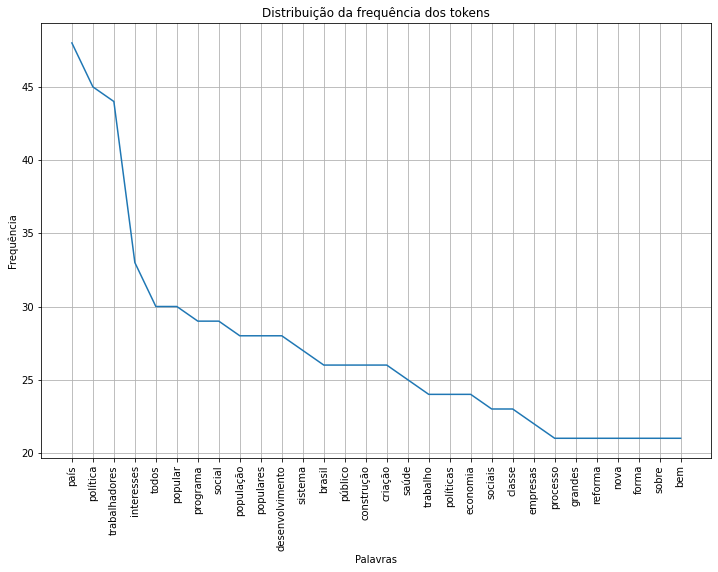

In [16]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(df.Palavra, df.Frequencia)

ax.set(xlabel='Palavras', ylabel='Frequência', title='Distribuição da frequência dos tokens')
plt.xticks(rotation=90)
ax.grid()

plt.show()

### 2 - Nuvem de palavras <a id="72"></a>

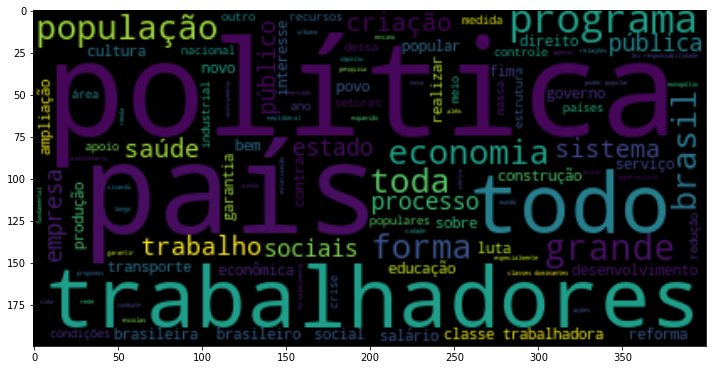

In [17]:
# concatenar os tokens limpos 
tokens_juntos = " ".join(s for s in conteudo_limpo)
wordcloud = WordCloud(background_color="black").generate(tokens_juntos)

# nuvem de palavras
fig, ax = plt.subplots(figsize=(10,6))
ax.imshow(wordcloud, interpolation='bilinear')

plt.tight_layout()

Victor Resende™ <br>
Outubro, 2022